# Stage 09 - Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import sys

df = pd.read_csv('../data/processed/VIX_S&P500_clean.csv')
df.head()

,date,vix_close,vix_high,vix_low,vix_open,sp500_close,sp500_high,sp500_low,sp500_open,sp500_volume
0,2019-08-28,19.350000,21.639999,19.10,20.549999,2887.939941,2890.030029,2853.050049,2861.280029,3102480000
1,2019-08-29,17.879999,19.200001,17.60,19.020000,2924.580078,2930.500000,2905.669922,2910.370117,3177150000
2,2019-08-30,18.980000,19.180000,17.09,17.940001,2926.459961,2940.429932,2913.320068,2937.090088,3009910000
3,2019-09-03,19.660000,21.150000,19.41,20.959999,2906.270020,2914.389893,2891.850098,2909.010010,3427830000
4,2019-09-04,17.330000,18.830000,17.26,18.230000,2937.780029,2938.840088,2921.860107,2924.669922,3167900000


In [2]:
# Feature 1: Log S&P 500

df['log_sp500_close'] = np.log(df['sp500_close'])

In [3]:
# Feature 2: VIX Delta & Spread

df['vix_delta'] = df['vix_close'] - df['vix_open']
df['vix_spread'] = df['vix_high'] - df['vix_low']

In [19]:
# Feature 3: S&P 500 Delta & Spread

df['sp500_delta'] = df['sp500_close'] - df['sp500_open']
df['sp500_spread'] = df['sp500_high'] - df['sp500_low']

In [20]:
out_path = '../data/processed/VIX_S&P500_features.csv'
df.to_csv(out_path, index = False)

df_features = pd.read_csv(out_path)
df_features.head()

,date,vix_close,vix_high,vix_low,vix_open,sp500_close,sp500_high,sp500_low,sp500_open,sp500_volume,log_sp500_close,vix_delta,vix_spread,sp500_delta,sp500_spread
0,2019-08-28,19.350000,21.639999,19.10,20.549999,2887.939941,2890.030029,2853.050049,2861.280029,3102480000,7.968299,-1.199999,2.539999,26.659912,36.979980
1,2019-08-29,17.879999,19.200001,17.60,19.020000,2924.580078,2930.500000,2905.669922,2910.370117,3177150000,7.980906,-1.140001,1.600000,14.209961,24.830078
2,2019-08-30,18.980000,19.180000,17.09,17.940001,2926.459961,2940.429932,2913.320068,2937.090088,3009910000,7.981549,1.039999,2.090000,-10.630127,27.109863
3,2019-09-03,19.660000,21.150000,19.41,20.959999,2906.270020,2914.389893,2891.850098,2909.010010,3427830000,7.974626,-1.299999,1.740000,-2.739990,22.539795
4,2019-09-04,17.330000,18.830000,17.26,18.230000,2937.780029,2938.840088,2921.860107,2924.669922,3167900000,7.985409,-0.900000,1.570000,13.110107,16.979980


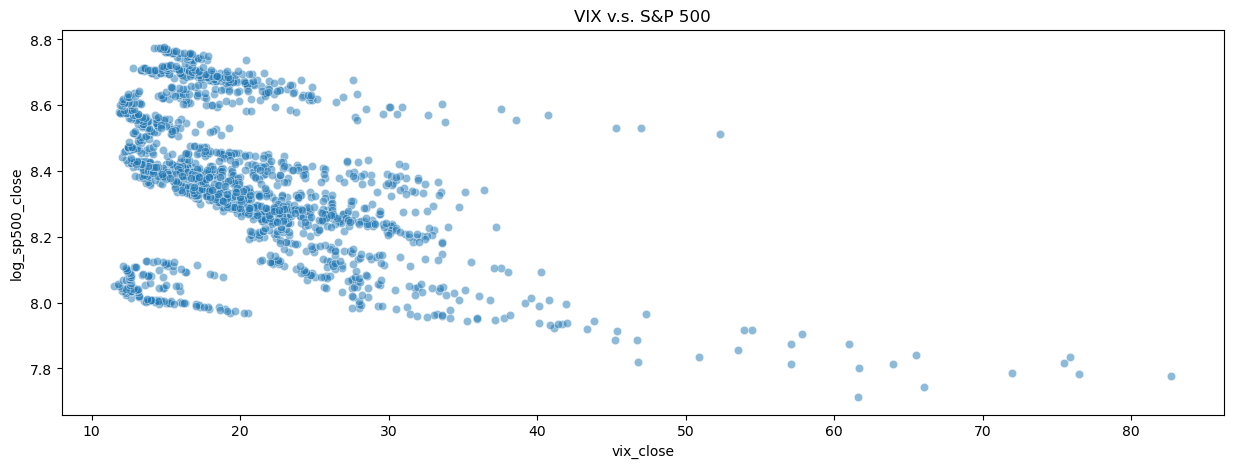

In [21]:
# Scatterplot of VIX v.s. log S&P 500

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,5))
sns.scatterplot(data = df, x = 'vix_close', y = 'log_sp500_close', alpha = 0.5)
plt.title('VIX v.s. S&P 500')
plt.show()

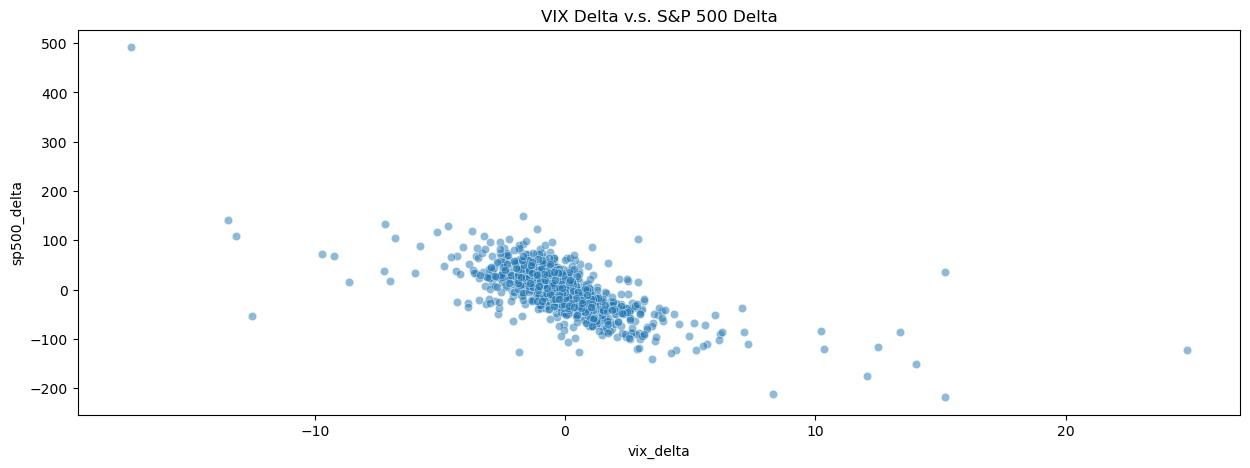

In [22]:
# Scatterplot of VIX delta v.s. S&P 500 delta

plt.figure(figsize = (15,5))
sns.scatterplot(data = df, x = 'vix_delta', y = 'sp500_delta', alpha = 0.5)
plt.title('VIX Delta v.s. S&P 500 Delta')
plt.show()

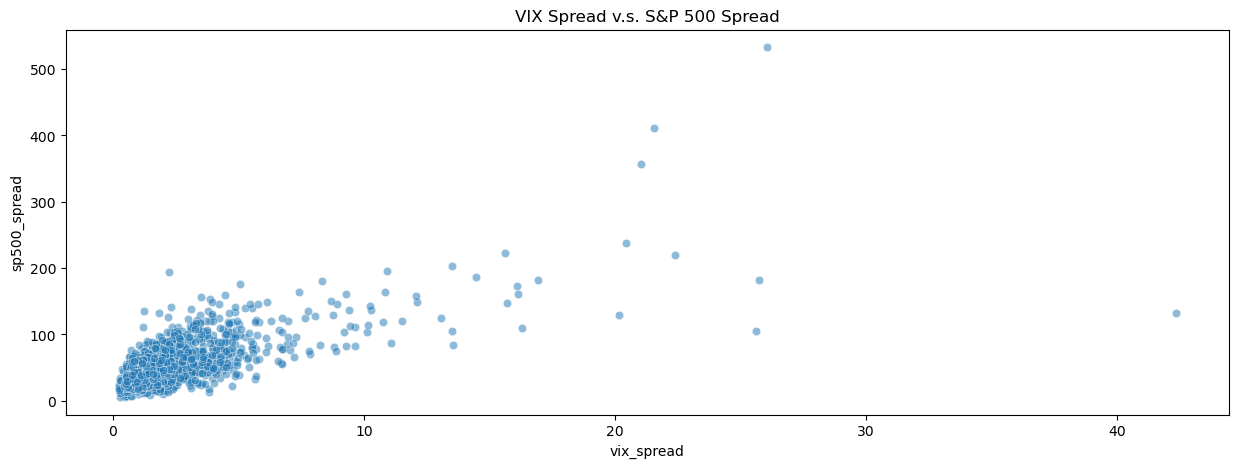

In [23]:
# Scatterplot of VIX spread v.s. S&P 500 spread

plt.figure(figsize = (15,5))
sns.scatterplot(data = df, x = 'vix_spread', y = 'sp500_spread', alpha = 0.5)
plt.title('VIX Spread v.s. S&P 500 Spread')
plt.show()

The rationale of features created is documented in `README.md` under Stage 09. 